In [8]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from functions import *

In [9]:
today = datetime.today().strftime('%Y-%m-%d')

## Plan

- Collect stock data for SPY, and different stocks based on market cap (small, medium, large)
- Cleean data
- EDA
- For each stock:
    - Feature engineering
        - Create features
        - Create target
        - Reduce dimensionality
            - XGBoost
            - Rabdom Forest
            - Hierarchical clusering
    - Split data
    - Create pipelines for models: Linear Regression (baseline), SARIMAX, XGBoost, Random Forest, Recurrent Neural Network
        - Grid search for hyperparameters
        - Train model
        - Evaluate model 
    - Compare models
- The model that is chosen the most based on market cap is the best model for that market cap
- Test models on unseen data (if there will be enough time)

## Collect data

In [10]:
# Tickers for the stocks we want to analyze
tickers = ['SPY', 'AAPL', 'PLTR', 'UBER', 'META', 'JPM', 'CVI', 'CUBE', 'DRS', 'PARAA', 'TRIP', 'TARS', 'STC', 'SJW', 'REVG', 'DAN']

# Get data for the stocks
data = get_data(tickers, period = '5y')

# Generate needed columns for each stock
data = generate_columns(data)

<Axes: xlabel='Date', ylabel='Cum_Return'>

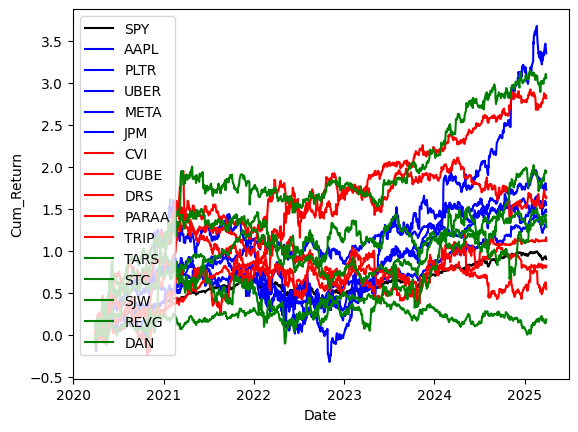

In [12]:
sns.lineplot(data = data['SPY']['Cum_Return'], label = 'SPY', color = 'black')

sns.lineplot(data = data['AAPL']['Cum_Return'], label = 'AAPL', color = 'blue')
sns.lineplot(data = data['PLTR']['Cum_Return'], label = 'PLTR', color = 'blue')
sns.lineplot(data = data['UBER']['Cum_Return'], label = 'UBER', color = 'blue')
sns.lineplot(data = data['META']['Cum_Return'], label = 'META', color = 'blue')
sns.lineplot(data = data['JPM']['Cum_Return'], label = 'JPM', color = 'blue')

sns.lineplot(data = data['CVI']['Cum_Return'], label = 'CVI', color = 'red')
sns.lineplot(data = data['CUBE']['Cum_Return'], label = 'CUBE', color = 'red')
sns.lineplot(data = data['DRS']['Cum_Return'], label = 'DRS', color = 'red')
sns.lineplot(data = data['PARAA']['Cum_Return'], label = 'PARAA', color = 'red')
sns.lineplot(data = data['TRIP']['Cum_Return'], label = 'TRIP', color = 'red')

sns.lineplot(data = data['TARS']['Cum_Return'], label = 'TARS', color = 'green')
sns.lineplot(data = data['STC']['Cum_Return'], label = 'STC', color = 'green')
sns.lineplot(data = data['SJW']['Cum_Return'], label = 'SJW', color = 'green')
sns.lineplot(data = data['REVG']['Cum_Return'], label = 'REVG', color = 'green')
sns.lineplot(data = data['DAN']['Cum_Return'], label = 'DAN', color = 'green')